### Dataset Credit

The dataset used in this project is sourced from Kaggle:

[Carlo Lepelaars - Toy Dataset on Kaggle](https://www.kaggle.com/datasets/carlolepelaars/toy-dataset/data)


In [4]:
import pandas as pd

df = pd.read_csv("../data/toy_dataset.csv")
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [8]:
#data cleaning-->
df.isnull().sum()
df_clean = df.dropna()
df_clean.head()


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [11]:
#sorting by income
df_sorted = df_clean.sort_values(by="Income", ascending=False)
df_sorted.head()


,Number,City,Gender,Age,Income,Illness
109350,109351,Mountain View,Male,58,177157.0,No
105281,105282,Mountain View,Male,41,176746.0,No
109060,109061,Mountain View,Male,61,173991.0,No
110877,110878,Mountain View,Male,52,173826.0,No
112192,112193,Mountain View,Male,58,172825.0,No


In [12]:
#grouping by gender n calculating avg age + income
df_grouped = df_clean.groupby("Gender")[["Age", "Income"]].mean().reset_index()
df_grouped


,Gender,Age,Income
0,Female,44.997764,85660.921843
1,Male,44.912625,95670.247196


In [14]:
# Count how many people per gender have illness
illness_counts = df_clean[df_clean["Illness"] == "Yes"].groupby("Gender")["Number"].count().reset_index()
illness_counts.columns = ["Gender", "Illness Count"]
illness_counts


,Gender,Illness Count
0,Female,5331
1,Male,6808


#### QUICK analysis-->Number of folks with illness by gender

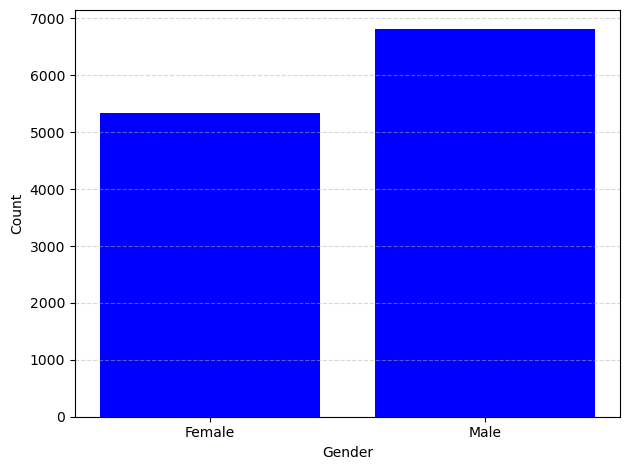

In [17]:
# +++ VIZ
import matplotlib.pyplot as plt

plt.bar(illness_counts["Gender"], illness_counts["Illness Count"], color="blue")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
